<a href="https://colab.research.google.com/github/Chaitra-Bhat383/Fruit-Identifier/blob/main/Fruits_Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Fri Jun  4 19:29:51 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!wget https://www.dropbox.com/s/nmy725nyna1jauw/FruitsData.zip?dl=0

--2021-06-04 19:31:33--  https://www.dropbox.com/s/nmy725nyna1jauw/FruitsData.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/nmy725nyna1jauw/FruitsData.zip [following]
--2021-06-04 19:31:34--  https://www.dropbox.com/s/raw/nmy725nyna1jauw/FruitsData.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3dd67a0911487acd3dc93a5051.dl.dropboxusercontent.com/cd/0/inline/BPwtbr0KXkjmnMu4HGLTMlhlMcNji4ltuHDPuLVWSQKIwcZIxjJbmiKXSDcT58ZLTXPyss2UBK52BmkJbDD9OGzY1yhhH2aIc8vgDpujwNAxGlC5dSc1BTcxicNK2DIaPxpeSlrWQn-QBfWjSKYwNJ4x/file# [following]
--2021-06-04 19:31:35--  https://uc3dd67a0911487acd3dc93a5051.dl.dropboxusercontent.com/cd/0/inline/BPwtbr0KXkjmnMu4HGLTMlhlMcNji4ltuHDPuLVWSQKIwcZIxjJbmiKXSDcT58ZLTXPyss2UBK52Bmk

In [ ]:
!unzip -q "/content/FruitsData.zip?dl=0"

In [ ]:
#Imports required for this project
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

tf.random.set_seed(4)

In [ ]:
# Creating the Pathlib PATH objects
train_path = Path("fruits-360/Training")
test_path = Path("fruits-360/Test")

In [ ]:
# Getting Image paths
train_image_paths = list(train_path.glob("*/*"))
train_image_paths = list(map(lambda x : str(x) , train_image_paths))

train_image_paths[:10]

['fruits-360/Training/Apple Pink Lady/120_100.jpg',
 'fruits-360/Training/Apple Pink Lady/r_189_100.jpg',
 'fruits-360/Training/Apple Pink Lady/233_100.jpg',
 'fruits-360/Training/Apple Pink Lady/r_274_100.jpg',
 'fruits-360/Training/Apple Pink Lady/r_129_100.jpg',
 'fruits-360/Training/Apple Pink Lady/r_287_100.jpg',
 'fruits-360/Training/Apple Pink Lady/0_100.jpg',
 'fruits-360/Training/Apple Pink Lady/r_123_100.jpg',
 'fruits-360/Training/Apple Pink Lady/r_79_100.jpg',
 'fruits-360/Training/Apple Pink Lady/205_100.jpg']

In [ ]:
# Getting their respective labels

def get_label(image_path):
  return image_path.split("/")[-2]

train_image_labels = list(map(lambda x : get_label(x) , train_image_paths))
train_image_labels[:10]

['Apple Pink Lady',
 'Apple Pink Lady',
 'Apple Pink Lady',
 'Apple Pink Lady',
 'Apple Pink Lady',
 'Apple Pink Lady',
 'Apple Pink Lady',
 'Apple Pink Lady',
 'Apple Pink Lady',
 'Apple Pink Lady']

In [ ]:
from sklearn.preprocessing import LabelEncoder

Le = LabelEncoder()
train_image_labels = Le.fit_transform(train_image_labels)

train_image_labels[:10]

array([6, 6, 6, 6, 6, 6, 6, 6, 6, 6])

In [ ]:
train_image_labels = tf.keras.utils.to_categorical(train_image_labels)

train_image_labels[:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
from sklearn.model_selection import train_test_split

Train_paths , Val_paths , Train_labels , Val_labels = train_test_split(train_image_paths , train_image_labels)

In [ ]:
Train_paths[:10] , Train_labels[:10]

(['fruits-360/Training/Maracuja/100_100.jpg',
  'fruits-360/Training/Pear Stone/r_289_100.jpg',
  'fruits-360/Training/Nut Forest/r_40_100.jpg',
  'fruits-360/Training/Strawberry/r_230_100.jpg',
  'fruits-360/Training/Walnut/r_238_100.jpg',
  'fruits-360/Training/Pear Williams/r_174_100.jpg',
  'fruits-360/Training/Tangelo/194_100.jpg',
  'fruits-360/Training/Plum 3/r_295_100.jpg',
  'fruits-360/Training/Apple Red Delicious/148_100.jpg',
  'fruits-360/Training/Cherry Rainier/197_100.jpg'],
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32))

In [ ]:
# Function used for Transformation

def load(image , label):
  image = tf.io.read_file(image)
  image = tf.io.decode_jpeg(image , channels = 3)
  return image , label

In [ ]:
# Define IMAGE SIZE and BATCH SIZE
IMG_SIZE = 224
BATCH_SIZE = 32

#Basic Transformation
resize = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE)                            
])

# Data Augmentation
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
  tf.keras.layers.experimental.preprocessing.RandomZoom(height_factor = (-0.3, -0.2))                                         
])

In [ ]:
# Function used to create a Tensorflow Data Object
AUTOTUNE = tf.data.experimental.AUTOTUNE
def get_dataset(paths , labels , train = True):
  image_paths = tf.convert_to_tensor(paths)
  labels = tf.convert_to_tensor(labels)

  image_dataset = tf.data.Dataset.from_tensor_slices(image_paths)
  label_dataset = tf.data.Dataset.from_tensor_slices(labels)

  dataset = tf.data.Dataset.zip((image_dataset , label_dataset))

  dataset = dataset.map(lambda image , label : load(image , label))
  dataset = dataset.map(lambda image , label: (resize(image), label) , num_parallel_calls=AUTOTUNE)
  dataset = dataset.shuffle(1000)
  dataset = dataset.batch(BATCH_SIZE)

  if train:
    dataset = dataset.map(lambda image, label: (data_augmentation(image), label) , num_parallel_calls=AUTOTUNE)

  dataset = dataset.repeat()
  return dataset

In [ ]:
#Creating Train Dataset object and verifying it
%time train_dataset = get_dataset(Train_paths , Train_labels)                                                

image , label = next(iter(train_dataset))
print(image.shape)
print(label.shape)

CPU times: user 321 ms, sys: 15.2 ms, total: 336 ms
Wall time: 364 ms
(32, 224, 224, 3)
(32, 131)


Granadilla


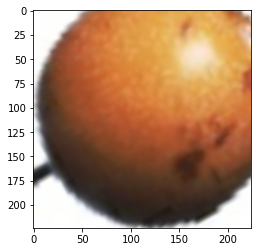

In [ ]:
# View a sample Training Image
print(Le.inverse_transform(np.argmax(label , axis = 1))[0])
plt.imshow((image[0].numpy()/255).reshape(224 , 224 , 3))

In [ ]:
%time val_dataset = get_dataset(Val_paths , Val_labels , train = False)

image , label = next(iter(val_dataset))
print(image.shape)
print(label.shape)

CPU times: user 29.7 ms, sys: 3.07 ms, total: 32.8 ms
Wall time: 38.5 ms
(32, 224, 224, 3)
(32, 131)


In [ ]:
# Building ResNet50 Model
from tensorflow.keras.applications import ResNet50V2

backbone = ResNet50V2(
    input_shape=(224, 224, 3),
    include_top=False
)

model = tf.keras.Sequential([
  backbone,
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(131, activation='softmax')
])

model.summary()

94674944/94668760 [==============================] - 1s 0us/step
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50v2 (Functional)      (None, 7, 7, 2048)        23564800  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 131)               268419    
Total params: 23,833,219
Trainable params: 23,787,779
Non-trainable params: 45,440
_________________________________________________________________


In [ ]:
# Compiling your model by providing the Optimiser , Loss and Metrics
model.compile(
    optimiser=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07),
    loss = 'categorial_crossentropy',
    metrics=['accuracy' , tf.keras.metrics.Precision(name='precision'),tf.keras.metrics.Recall(name='recall')] 
)